In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
iris=pd.read_csv('Iris.csv')

In [40]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [44]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [45]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [46]:
iris['Id'].nunique()

150

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

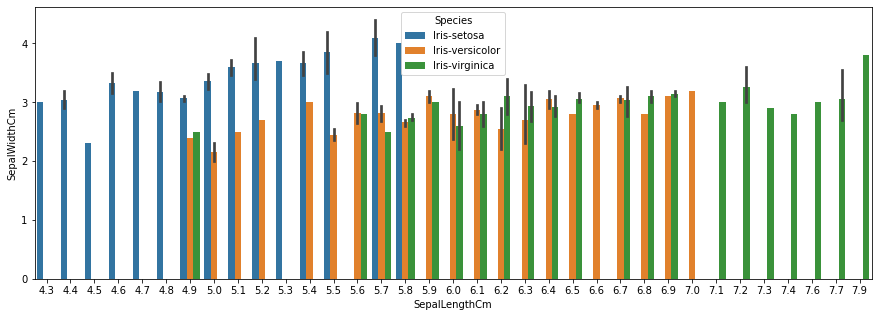

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=iris)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

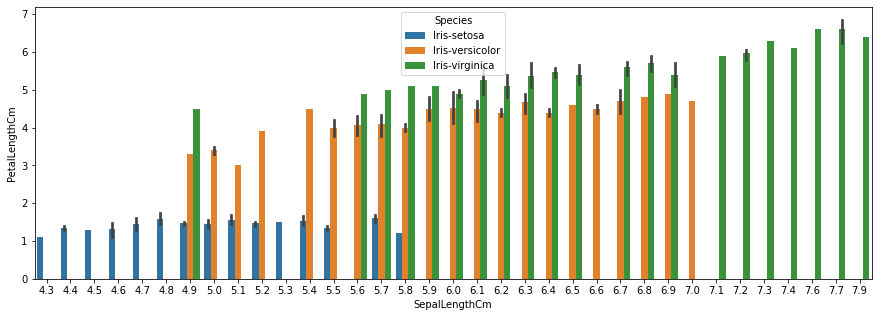

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=iris)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

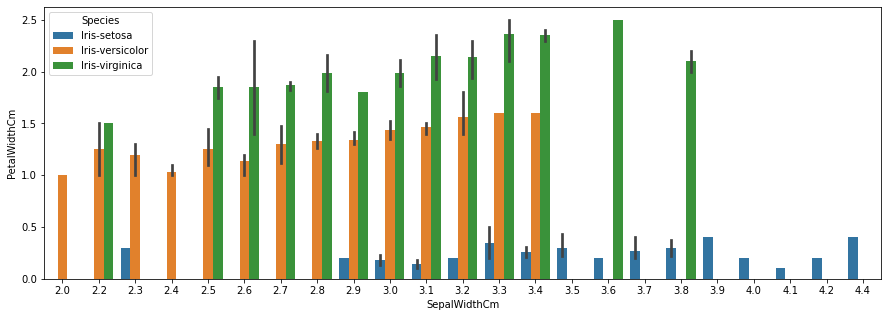

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',data=iris)

<AxesSubplot:xlabel='Species', ylabel='count'>

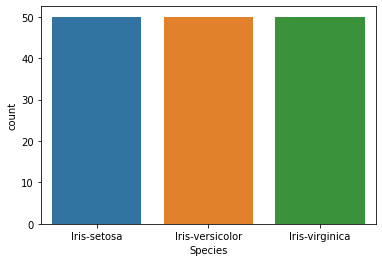

In [52]:
sns.countplot(x='Species',data=iris)

<AxesSubplot:>

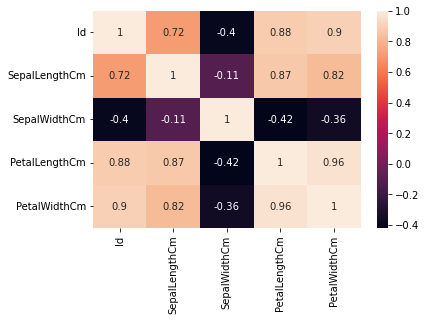

In [54]:
sns.heatmap(iris.corr(),annot=True)

In [57]:
iris.drop('Id',axis=1,inplace=True)

In [58]:
from pandas_profiling import ProfileReport

In [60]:
pp_report=ProfileReport(iris)

In [61]:
pp_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

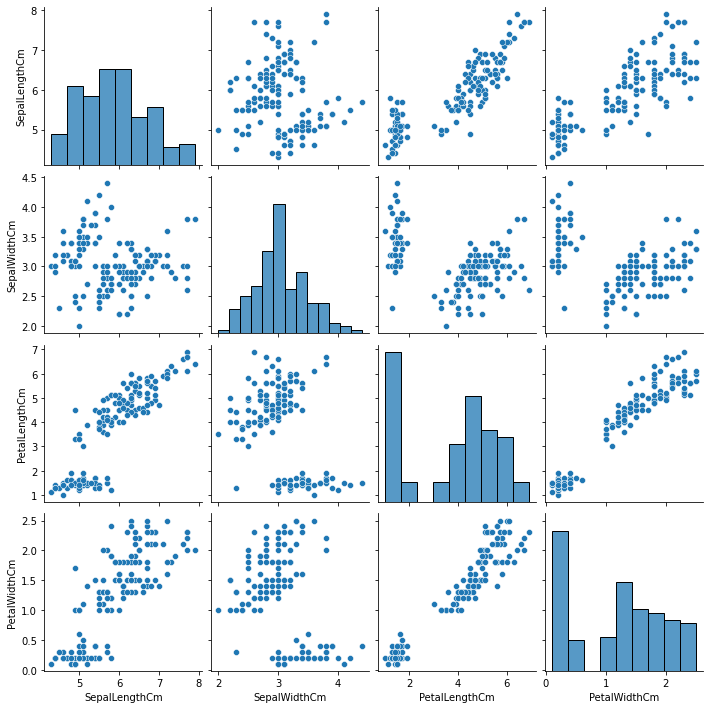

In [62]:
sns.pairplot(iris)

In [63]:
from sklearn.model_selection import train_test_split

In [78]:
X=iris.drop('Species',axis=1)
y=iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=102)

# Logistic Regression 

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr=LogisticRegression()

In [81]:
lr.fit(X_train,y_train)

LogisticRegression()

In [82]:
predict1=lr.predict(X_test)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<AxesSubplot:>

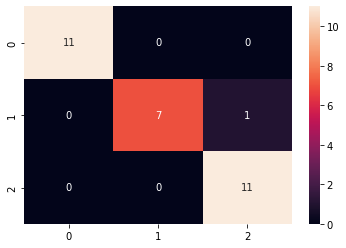

In [84]:
conf1=confusion_matrix(y_test,predict1)
sns.heatmap(conf1,annot=True)

In [87]:
acc1=accuracy_score(y_test,predict1)
acc1

0.9666666666666667

In [86]:
print(classification_report(y_test,predict1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



 Using Grid Search Method

In [88]:
from sklearn.model_selection import GridSearchCV

In [129]:
param_gridlr={
    'max_iter':[10,15],
    'solver':['sag','saga','lbfgs'],
    'class_weight':['balanced']
}

In [130]:
log_model=GridSearchCV(estimator=LogisticRegression(random_state=102),param_grid=param_gridlr,verbose=1,cv=10,n_jobs=-1)

In [131]:
log_model.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


C:\Users\VIKAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=102), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_iter': [10, 15],
                         'solver': ['sag', 'saga', 'lbfgs']},
             verbose=1)

In [132]:
print(log_model.best_estimator_)

LogisticRegression(class_weight='balanced', max_iter=10, random_state=102)


In [134]:
lr2=LogisticRegression(class_weight='balanced', max_iter=10, random_state=101)

In [135]:
lr2.fit(X_train,y_train)

C:\Users\VIKAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=10, random_state=101)

In [136]:
pred2=lr.predict(X_test)

<AxesSubplot:>

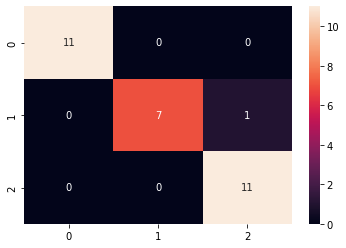

In [137]:
conf2=confusion_matrix(y_test,pred2)
sns.heatmap(conf2,annot=True)

In [139]:
print(classification_report(y_test,pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



# KNN Method

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler=StandardScaler()

In [144]:
scaler.fit(iris.drop('Species',axis=1))

StandardScaler()

In [145]:
scaler_features=scaler.transform(iris.drop('Species',axis=1))

In [148]:
X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(scaler_features, iris['Species'], test_size=0.33, random_state=42)

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sd,y_train_sd)
    pred_i=knn.predict(X_test_sd)
    error_rate.append(np.mean(pred_i != y_test_sd))

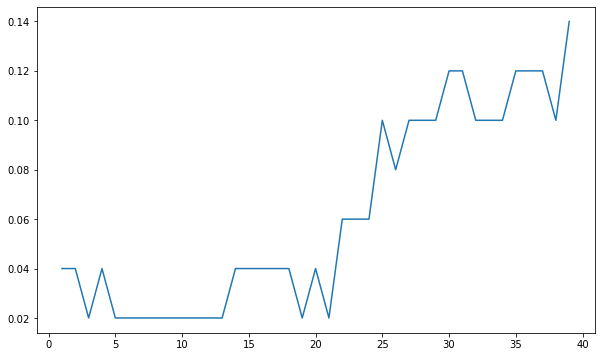

In [154]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

In [155]:
knn1=KNeighborsClassifier(n_neighbors=3)

In [156]:
knn1.fit(X_train_sd,y_train_sd)

KNeighborsClassifier(n_neighbors=3)

In [157]:
pred3=knn1.predict(X_test_sd)

In [158]:
acc2=accuracy_score(y_test_sd,pred3)
acc2

0.98

<AxesSubplot:>

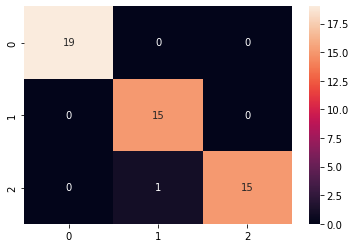

In [159]:
conf3=confusion_matrix(y_test_sd,pred3)
sns.heatmap(conf3,annot=True)

In [160]:
print(classification_report(y_test_sd,pred3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



#  Random Forest 

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
rfc=RandomForestClassifier(n_estimators=100)

In [175]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [176]:
pred4=rfc.predict(X_test)

In [177]:
acc3=accuracy_score(y_test,pred4)
acc3

0.9666666666666667

<AxesSubplot:>

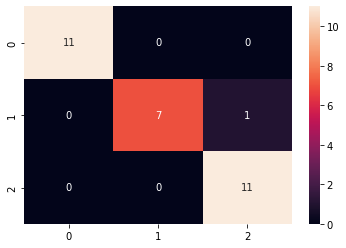

In [178]:
conf4=confusion_matrix(y_test,pred4)
sns.heatmap(conf4,annot=True)

In [179]:
print(classification_report(y_test,pred4))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

